# Simple Linear Regression 

In this notebook, we'll build a linear regression model to predict 'Sales' using 'TV' as the predictor variable.


## Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [54]:
import pandas as pd

In [55]:
advertising = pd.read_csv("tvmarketing.csv")

Now, let's check the structure of the advertising dataset.

In [56]:
# Display the first 5 rows
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [57]:
# Display the last 5 rows
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [58]:
# Let's check the columns
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
TV       200 non-null float64
Sales    200 non-null float64
dtypes: float64(2)
memory usage: 3.2 KB


In [59]:
# Check the shape of the DataFrame (rows, columns)
advertising.shape

(200, 2)

In [60]:
# Let's look at some statistical information about the dataframe.
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


# Visualising Data Using Seaborn

In [61]:
# Conventional way to import seaborn
import seaborn as sns

# To visualise in the notebook
%matplotlib inline

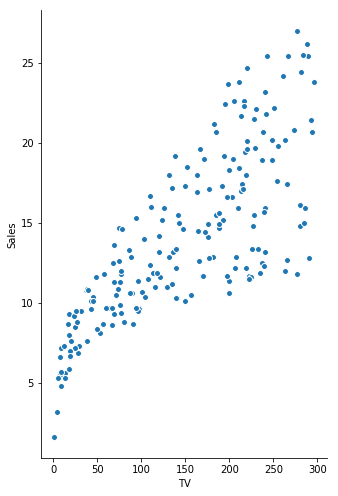

In [62]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(advertising, x_vars=['TV'], y_vars='Sales',size=7, aspect=0.7, kind='scatter')

# Perfroming Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

### Generic Steps in Model Building using ```sklearn```

Before you read further, it is good to understand the generic structure of modeling using the scikit-learn library. Broadly, the steps to build any model can be divided as follows: 

In [63]:
# 1. Create the datasets X_train, y_train, X_test and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

# 2. Create (or instantiate) an object of the model you want to build, e.g.
lr = LinearRegression()

# 3. Fit the model using the training data 
lr.fit(X_train, y_train)

# 4. Predict the labels using the test data X_test
y_pred = lr.predict(X_test)


# 5. Evaluate the model using an appropriate metric by comparing y_test and y_predicted
r_squared = r2_score(y_test, y_pred)

ValueError: Expected 2D array, got 1D array instead:
array=[213.4 151.5 205.  142.9 134.3  80.2 239.8  88.3  19.4 225.8 136.2  25.1
  38.  172.5 109.8 240.1 232.1  66.1 218.4 234.5  23.8  67.8 296.4 141.3
 175.1 220.5  76.4 253.8 191.1 287.6 100.4 228.  125.7  74.7  57.5 262.7
 262.9 237.4 227.2 199.8 228.3 290.7 276.9 199.8 239.3  73.4 284.3 147.3
 224.  198.9 276.7  13.2  11.7 280.2  39.5 265.6  27.5 280.7  78.2 163.3
 213.5 293.6  18.7  75.5 166.8  44.7 109.8   8.7 266.9 206.9 149.8  19.6
  36.9 199.1 265.2 165.6 140.3 230.1   5.4  17.9 237.4 286.   93.9 292.9
  25.   97.5  26.8 281.4  69.2  43.1 255.4 239.9 209.6   7.3 240.1 102.7
 243.2 137.9  18.8  17.2  76.4 139.5 261.3  66.9  48.3 177.   28.6 180.8
 222.4 193.7  59.6 131.7   8.4  13.1   4.1   0.7  76.3 250.9 273.7  96.2
 210.8  53.5  90.4 104.6 283.6  95.7 204.1  31.5 182.6 289.7 156.6 107.4
  43.  248.4 116.  110.7 187.9 139.3  62.3   8.6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Preparing X and y

-  The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
-  However, X can be a dataframe as Pandas is built over NumPy.

In [ ]:
# Putting feature variable to X
X = advertising['TV']

# Print the first 5 rows
X.head()

In [ ]:
# Putting response variable to y
y = advertising['Sales']

# Print the first 5 rows
y.head()

## Splitting Data into Training and Testing Sets

In [ ]:
#random_state is the seed used by the random number generator, it can be any integer.

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

In [ ]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

In [ ]:
train_test_split   #Press Tab to auto-fill the code
#Press Tab+Shift to read the documentation

In [ ]:
#It is a general convention in scikit-learn that observations are rows, while features are columns. 
#This is needed only when you are using a single feature; in this case, 'TV'.

import numpy as np

X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Performing Linear Regression

In [ ]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

## Coefficients Calculation

In [ ]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

$y = 6.923 + 0.0481 \times TV + 0.179$<br>

Now, let's use this equation to predict our sales.

## Predictions

In [ ]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

In [ ]:
type(y_pred)

#### Computing RMSE and R^2 Values

In [ ]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

In [ ]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [ ]:
r_squared = r2_score(y_test, y_pred)

In [ ]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')